In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
x_digits = digits.data
y_digits = digits.target

x_digits.shape

(1797, 64)

In [17]:

print(x_digits.shape)

(1797, 64)


In [45]:
n_samples = len(x_digits)
x_train = x_digits[:round(.9 * n_samples)]
y_train = y_digits[:round(.9 * n_samples)]
x_test = x_digits[round(.9 * n_samples):]
y_test = y_digits[round(.9 * n_samples):]

print(x_train.shape)
print(n_samples)

(1617, 64)
1797


In [37]:
#import KNN stuff and make a binary model 
from sklearn.neighbors import KNeighborsClassifier


#define new target boolean arrays for binary KNN classifier
y_train_2 = (y_train==2)
y_test_2 = (y_train==2)


#define the model and fit our training data to it (training)

knn_clf_2 = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf_2.fit(x_train, y_train_2)




KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [38]:
#predict the outcome of the 100th datapoint (x_train[99])

some_digit = x_digits[1719]

print(knn_clf_2.predict([some_digit]))
print(y_digits[1719])

[False]
7


# Get performance of the binary KNN we defined above

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf_2, x_train, y_train_2, cv=3, scoring="accuracy")

array([0.98701299, 0.99443414, 0.99257885])

# Confusion Matrix for our KNN above


In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf_2, x_train, y_train_2, cv=3)
confusion_matrix(y_train_2, y_train_pred)


array([[1455,    2],
       [  12,  148]], dtype=int64)

# MULTICLASS CLASSIFICATION


In [43]:
from sklearn.neighbors import KNeighborsClassifier
#declare the classifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
#fit our training data to the model knn_clf
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [49]:
#run predictions for our test set
from sklearn.metrics import accuracy_score
y_knn_pred = knn_clf.predict(x_test)
accuracy_score(y_knn_pred,y_test)

0.9722222222222222

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx
print(conf_mx.shape)


(10, 10)


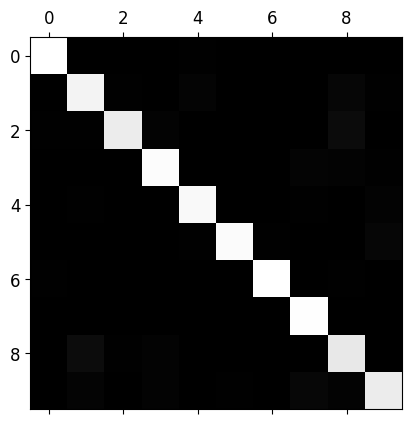

In [52]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [75]:
knn_clf = KNeighborsClassifier(n_jobs = -1, weights = 'distance', n_neighbors= 4 )
knn_clf.fit(x_train,y_train)
scores =[]
for i in range(2,30):
    #each loop is a different number for cv
    score = cross_val_score(knn_clf, x_train, y_train, cv= i , n_jobs=-1)
    scores.append(score.mean())
max_val = max(scores)
print(max_val)
print("Best folds value: ", scores.index(max_val))
print(scores[:18])
#18th values - so index 17, but since we start at 2 its actually with 17+2 = 19  folds
test = cross_val_score(knn_clf, x_train, y_train, cv = 19, n_jobs=-1 )
print(test.mean())


0.9857873137014904
Best folds value:  17
[0.9505279406185365, 0.961038961038961, 0.9610484659577068, 0.9672323510300807, 0.9752719262012942, 0.9684601113172542, 0.9728027605716236, 0.9771329057176357, 0.9765125373821026, 0.9783549783549784, 0.977132854247282, 0.9765161290322582, 0.9820732490897408, 0.982064151378793, 0.9827096680256261, 0.9827012383900928, 0.985143570536829, 0.9857873137014904]
0.9857873137014904
